In [55]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [62]:
def visualize_graph(G):

    # SET LAYOUT
    pos = nx.spring_layout(G, k=1, iterations=20)

    # GET NODE INFO
    in_degrees = dict(G.in_degree())

    # SET NODE SIZING
    node_sizes = [in_degrees[node]*30 for node in G.nodes()]

    # DRAW NETWORK
    nx.draw(G,
        node_size=node_sizes,
        pos=pos
    )


def in_degree_summary(G):

    # PRINT NUMBER OF NODES
    print(f"Number of nodes (surfers): {len(G.nodes())}\n")

    # GET IN-DEGREE STATS
    print("IN-DEGREE SUMMARY:")
    node_in_degrees = dict(G.in_degree(weight="weight"))
    in_degree_list = list(node_in_degrees.values())
    surfer_list = list(node_in_degrees.keys())

    # SHOW HISTOGRAM
    sns.histplot(in_degree_list, bins=20, color="darkblue")
    plt.title("Distribution of In-degree", fontsize=18)
    plt.xlabel("In-degree", fontsize=14)
    plt.ylabel("Surfer count", fontsize=14)
    plt.show(); plt.clf()

    # MAKE DATAFRAME
    in_degree_df = pd.DataFrame({"surfer": surfer_list, "in-degree": in_degree_list})
    in_degree_df = in_degree_df.sort_values(by="in-degree", ascending=False)
    in_degree_df.reset_index(inplace=True, drop=True)
    print(in_degree_df.head(20))
    print("\n")
    
    # ISOLATE TOP SURFERS BY IN-DEGREE
    nodes_over = in_degree_df[in_degree_df["in-degree"] > 400]
    perc_over = len(nodes_over) / len(in_degree_df)
    print(f"Number of surfers with in-degree > 400: {len(nodes_over)}")
    print(f"Surfers with in-degree >400: {round(perc_over, 4)*100}%")
    


## Analysis of in-degree

Number of nodes (surfers): 131

IN-DEGREE SUMMARY:


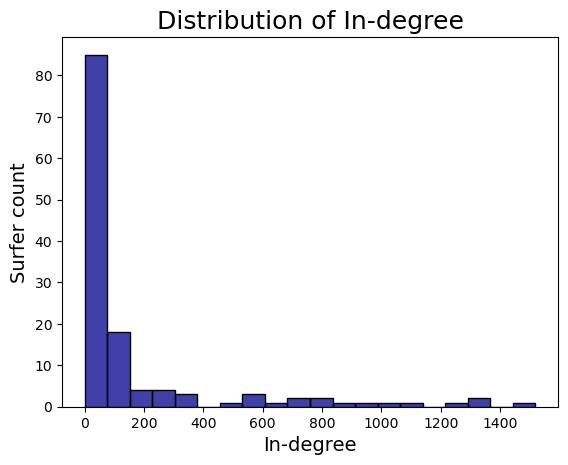

                surfer  in-degree
0       Gabriel Medina       1519
1         Mick Fanning       1319
2         Kelly Slater       1306
3          Jordy Smith       1267
4        Julian Wilson       1080
5       Joel Parkinson       1053
6     Adriano de Souza        941
7   John John Florence        851
8           Taj Burrow        815
9        Michel Bourez        788
10         Owen Wright        726
11       Filipe Toledo        718
12           Josh Kerr        629
13       Jeremy Flores        605
14       Adrian Buchan        575
15      Italo Ferreira        570
16       Kolohe Andino        512
17     Sebastian Zietz        359
18      Kanoa Igarashi        329
19       Bede Durbidge        321


Number of surfers with in-degree > 400: 17
Surfers with in-degree >400: 12.98%


<Figure size 640x480 with 0 Axes>

In [63]:
net = nx.read_gml(f"../data/networks/overall_results_network.gml")
in_degree_summary(net)

---------------------------------------------
EVENT: MARGARET-RIVER_RESULTS
Number of nodes: 105


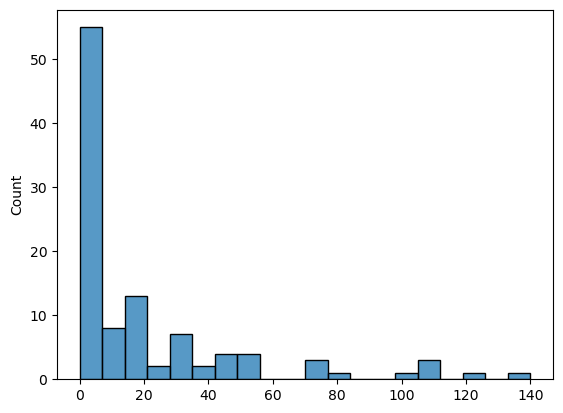

Julian Wilson: 140
Jordy Smith: 121
John John Florence: 109
Michel Bourez: 107
---------------------------------------------
EVENT: QUIKSILVER-PRO-GOLD-COAST_RESULTS
Number of nodes: 131


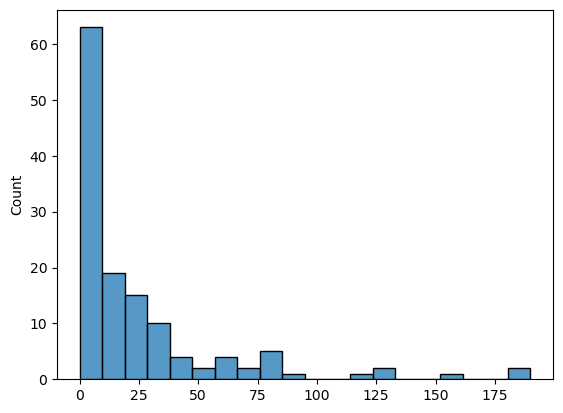

Taj Burrow: 190
Joel Parkinson: 186
Adriano de Souza: 153
Jordy Smith: 132
---------------------------------------------
EVENT: TEAHUPOO_RESULTS
Number of nodes: 131


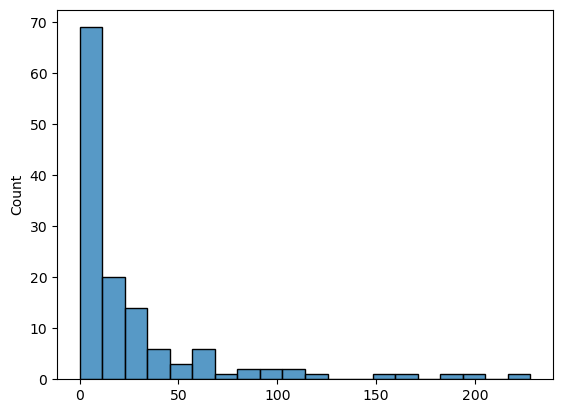

Gabriel Medina: 228
Jeremy Flores: 199
Owen Wright: 192
Kelly Slater: 166
---------------------------------------------
EVENT: BILLABONG-PIPE-MASTERS_RESULTS
Number of nodes: 131


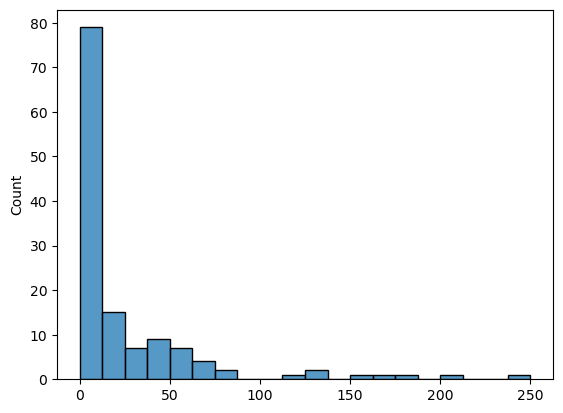

Kelly Slater: 250
Gabriel Medina: 207
John John Florence: 175
Joel Parkinson: 171
---------------------------------------------
EVENT: FIJI_RESULTS
Number of nodes: 90


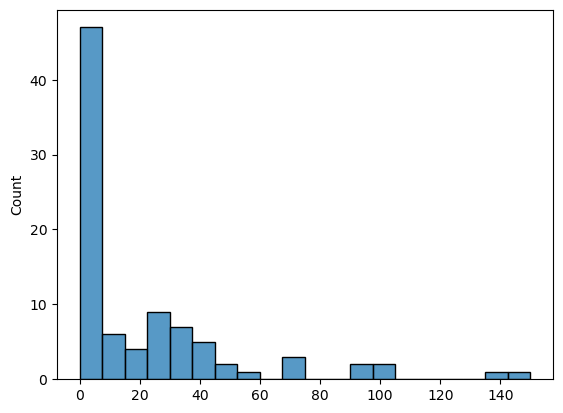

Kelly Slater: 150
Mick Fanning: 142
Taj Burrow: 101
Joel Parkinson: 98
---------------------------------------------
EVENT: J-BAY_RESULTS
Number of nodes: 130


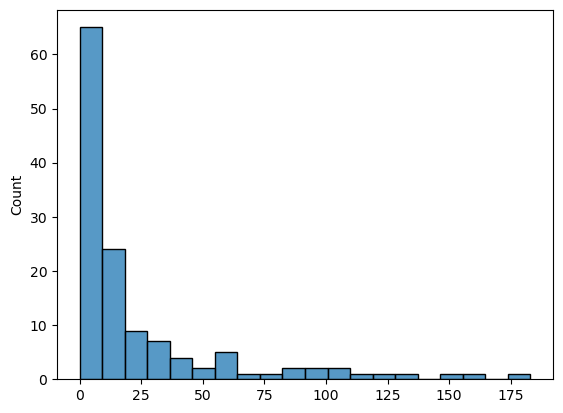

Mick Fanning: 183
Gabriel Medina: 163
Jordy Smith: 151
Julian Wilson: 134
---------------------------------------------
EVENT: RIO_RESULTS
Number of nodes: 116


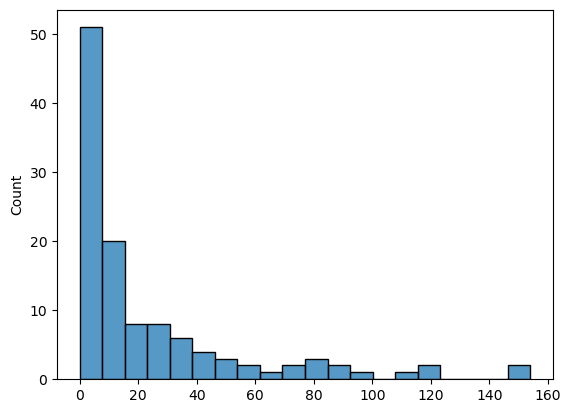

Adriano de Souza: 154
Filipe Toledo: 153
Jordy Smith: 122
Gabriel Medina: 116
---------------------------------------------
EVENT: PORTUGAL_RESULTS
Number of nodes: 131


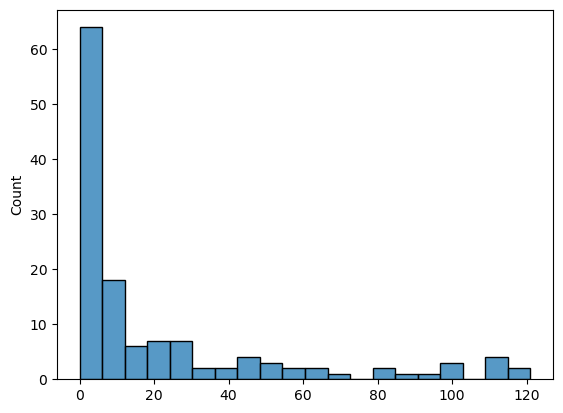

Gabriel Medina: 121
Michel Bourez: 117
Jordy Smith: 114
Julian Wilson: 111
---------------------------------------------
EVENT: BALI_RESULTS
Number of nodes: 83


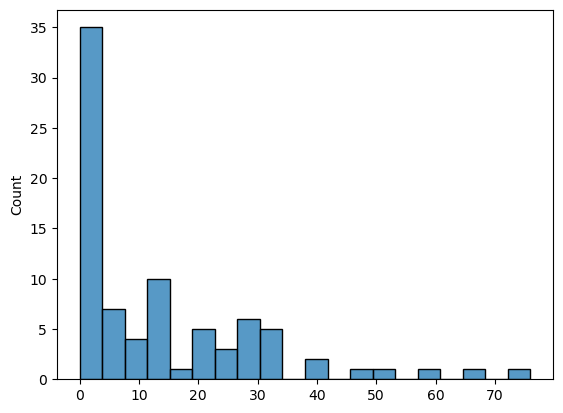

Michel Bourez: 76
Jeremy Flores: 65
Filipe Toledo: 58
Adrian Buchan: 52
---------------------------------------------
EVENT: QUIKSILVER-PRO-FRANCE_RESULTS
Number of nodes: 131


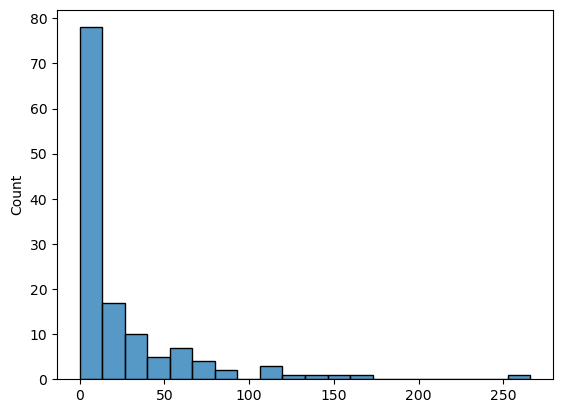

Gabriel Medina: 266
Kolohe Andino: 162
Julian Wilson: 150
Mick Fanning: 138
---------------------------------------------
EVENT: OVERALL_RESULTS
Number of nodes: 131


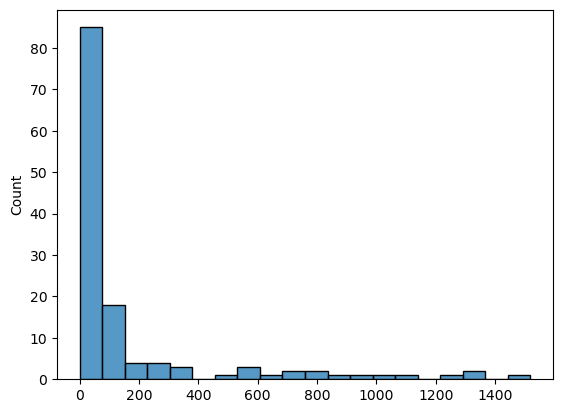

Gabriel Medina: 1519
Mick Fanning: 1319
Kelly Slater: 1306
Jordy Smith: 1267
---------------------------------------------
EVENT: TRESTLES_RESULTS
Number of nodes: 111


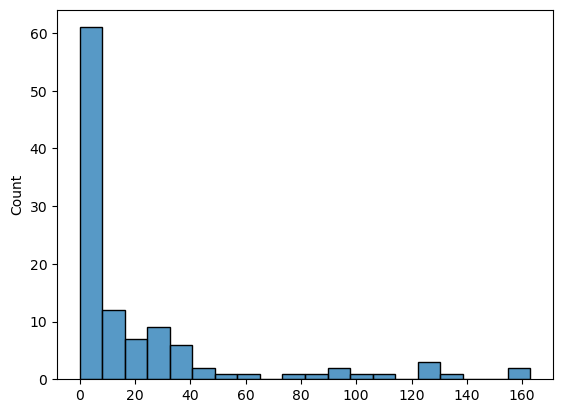

Mick Fanning: 163
Kelly Slater: 158
Jordy Smith: 132
Adriano de Souza: 130
---------------------------------------------
EVENT: RIP-CURL-PRO-BELLS-BEACH_RESULTS
Number of nodes: 131


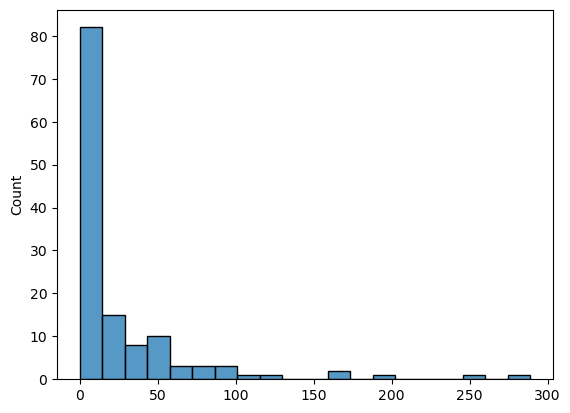

Mick Fanning: 289
Jordy Smith: 256
Adriano de Souza: 188
Joel Parkinson: 172


<Figure size 640x480 with 0 Axes>

In [11]:
network_files = os.listdir("../data/networks")

for file in network_files:

    event_name = file.split("_network")[0]
    print("---------------------------------------------")
    print(f"EVENT: {event_name.upper()}")

    net = nx.read_gml(f"../data/networks/{file}")

    quick_summary(net)